In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'salary_data_cleaned.csv')

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,max_salary,avg_salary,Company_txt,Job_State,age_of_company,python_yn,sql_yn,excel_yn,spark_yn,aws_yn
0,Data Scientist,$60K - $140K (Employer est.),"We are looking for junior, mid-level or senior...",-1.0,Tech brothers infoservices,Remote,Unknown,-1,Company - Public,unknown,...,140,100.0,Tech brothers infoservices,Remote,-1,1,1,1,0,0
1,Data Scientist,$60K - $140K (Employer est.),Description: Would you like to join a rapidly ...,4.3,"ClassLink, Inc.\r\n4.3",Remote,Unknown,-1,Company - Private,Internet & Web Services,...,140,100.0,"ClassLink, Inc.\r\n",Remote,-1,0,0,0,0,0
2,Data Scientist,$60K - $140K (Employer est.),"Do you have a passion for data science, machin...",4.3,Microsoft\r\n4.3,"Cambridge, MA",10000+ Employees,1975,Company - Public,Computer Hardware Development,...,140,100.0,Microsoft\r\n,MA,48,0,0,0,0,1
3,Data Scientist,$60K - $140K (Employer est.),Roles & Responsibilities: Provides support of ...,-1.0,Ai Vantage,Remote,Unknown,-1,Company - Public,unknown,...,140,100.0,Ai Vantage,Remote,-1,0,0,0,0,0
4,Data Scientist,$60K - $140K (Employer est.),Who May Apply\r\n\r\nJob Opening: 46673. Job P...,4.1,Federal Bureau of Investigation\r\n4.1,"Washington, DC",10000+ Employees,1908,Government,National Agencies,...,140,100.0,Federal Bureau of Investigation\r\n,DC,115,0,0,0,0,0


In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df['job_simp'].value_counts()

job_simp
data scientist    478
na                 12
analyst             8
data engineer       2
Name: count, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)

In [9]:
df.seniority.value_counts()

seniority
na        348
senior    141
jr         11
Name: count, dtype: int64

In [10]:
# fixing some state values

In [11]:
df['Job_State'].value_counts()

Job_State
 CA               99
Remote            98
 TX               44
 NY               38
 VA               22
 IL               21
United States     17
 NJ               15
 MA               13
 FL               12
 NC               11
 WA               10
California         9
 CO                9
 MD                8
 GA                7
 MO                7
 DC                7
 MN                7
 MI                6
 CT                5
 IN                4
Texas              4
 AZ                4
 OH                3
Alabama            2
 LA                2
 OR                2
 TN                1
Illinois           1
 AL                1
 WI                1
 UT                1
 DE                1
New York State     1
Maryland           1
 HI                1
 KY                1
Massachusetts      1
Maine              1
 PA                1
Virginia           1
Name: count, dtype: int64

In [12]:
# Define a mapping of state full names to abbreviations
state_mapping = {
    'California': 'CA',
    'Texas': 'TX',
    'Alabama': 'AL',
    'Illinois': 'IL',
    'New York State': 'NY',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Maine': 'ME',
    'Virginia': 'VA',
    'United States': 'US'
}

# Replace full state names with abbreviations in the 'States' column
df['Job_State'] = df['Job_State'].replace(state_mapping)

In [13]:
df['Job_State'].value_counts()

Job_State
 CA       99
Remote    98
 TX       44
 NY       38
 VA       22
 IL       21
US        17
 NJ       15
 MA       13
 FL       12
 NC       11
 WA       10
CA         9
 CO        9
 MD        8
 GA        7
 MO        7
 DC        7
 MN        7
 MI        6
 CT        5
 IN        4
TX         4
 AZ        4
 OH        3
AL         2
 LA        2
 OR        2
 TN        1
IL         1
 AL        1
 WI        1
 UT        1
 DE        1
NY         1
MD         1
 HI        1
 KY        1
MA         1
ME         1
 PA        1
VA         1
Name: count, dtype: int64

In [14]:
# job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       549
1       784
2      1939
3      1474
4       657
       ... 
495    1279
496     833
497     760
498    1591
499     692
Name: desc_len, Length: 500, dtype: int64

In [15]:
# removal of new line characters from company name

In [16]:
df['Company_txt'] = df['Company_txt'].apply(lambda x: x.replace('\n', ''))

In [17]:
# also removing the '\r character'
df['Company_txt'] = df['Company_txt'].apply(lambda x: x.replace('\r', ''))

In [18]:
df['Company_txt']

0                Tech brothers infoservices
1                           ClassLink, Inc.
2                                 Microsoft
3                                Ai Vantage
4           Federal Bureau of Investigation
                       ...                 
495                             Freddie Mac
496                                Hatch IT
497                                 Verizon
498    Teachers College Columbia University
499                        Restaurant Depot
Name: Company_txt, Length: 500, dtype: object

In [19]:
df.describe()

,Rating,Founded,min_salary,max_salary,avg_salary,age_of_company,python_yn,sql_yn,excel_yn,spark_yn,aws_yn,desc_len
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.330800,1590.388000,110.060000,183.380000,146.720000,39.762000,0.110000,0.090000,0.112000,0.026000,0.054000,1285.406000
std,1.632943,782.937384,31.721111,81.573919,53.963002,51.056389,0.313203,0.286468,0.315682,0.159295,0.226244,1146.161214
min,-1.000000,-1.000000,50.000000,80.000000,65.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.000000
25%,3.500000,1884.500000,92.000000,130.000000,112.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,711.250000
50%,3.900000,1977.500000,112.000000,143.000000,126.500000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,923.000000
75%,4.100000,2006.000000,140.000000,218.000000,165.000000,53.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1317.000000
max,5.000000,2022.000000,153.000000,332.000000,242.500000,333.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8040.000000


<Axes: >

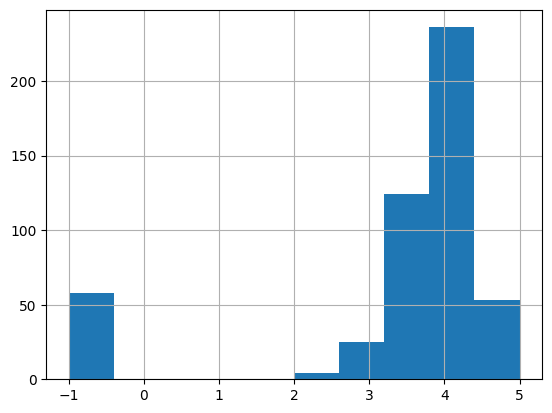

In [20]:
df.Rating.hist()

<Axes: >

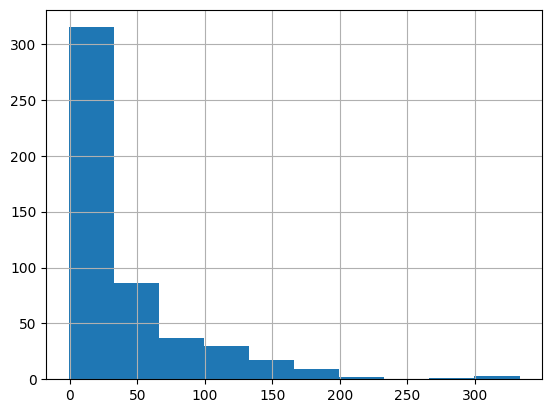

In [21]:
df.age_of_company.hist()

<Axes: >

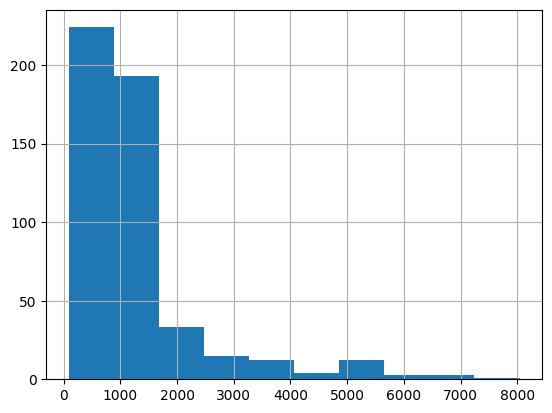

In [22]:
df.desc_len.hist()

<Axes: >

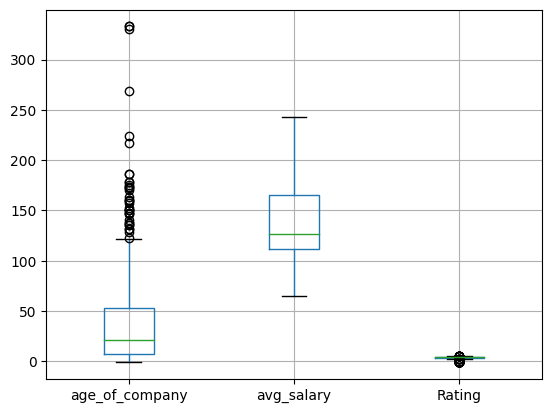

In [23]:
df.boxplot(column = ['age_of_company', 'avg_salary', 'Rating'])

<Axes: >

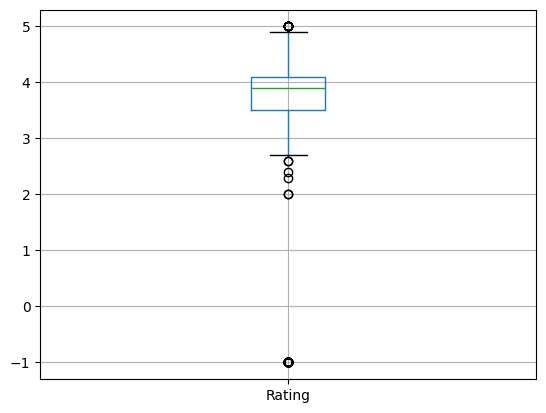

In [24]:
df.boxplot('Rating')

In [25]:
df[['age_of_company','avg_salary','Rating','desc_len']].corr()

,age_of_company,avg_salary,Rating,desc_len
age_of_company,1.000000,0.025844,0.258850,-0.007954
avg_salary,0.025844,1.000000,0.095370,0.053022
Rating,0.258850,0.095370,1.000000,0.102844
desc_len,-0.007954,0.053022,0.102844,1.000000


<Axes: >

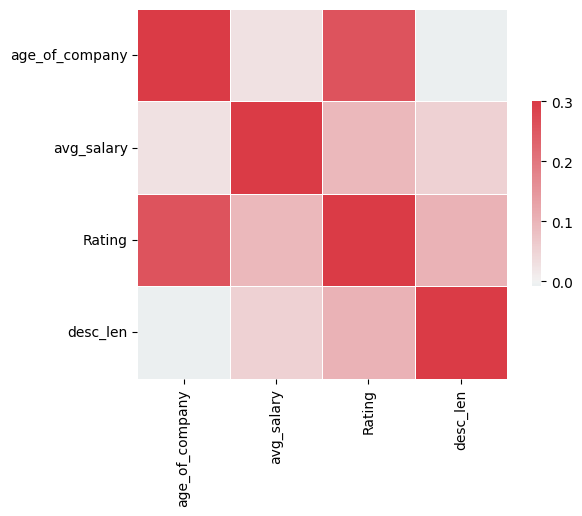

In [26]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age_of_company','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'Company_txt', 'Job_State', 'age_of_company', 'python_yn',
       'sql_yn', 'excel_yn', 'spark_yn', 'aws_yn', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

In [28]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 
             'Revenue', 'Company_txt', 'Job_State', 'python_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority']]

graph for Location: total = 165


C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


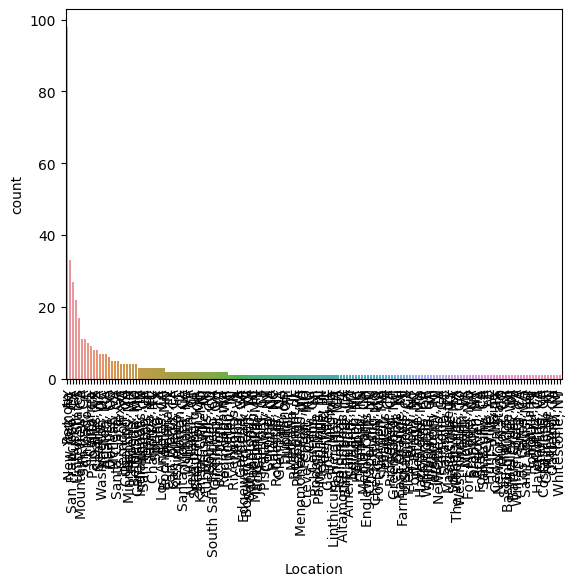

graph for Size: total = 9


C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


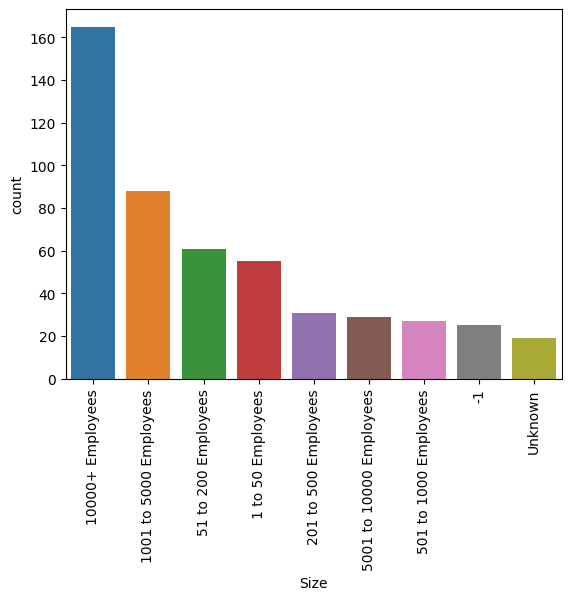

graph for Type of ownership: total = 12


C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


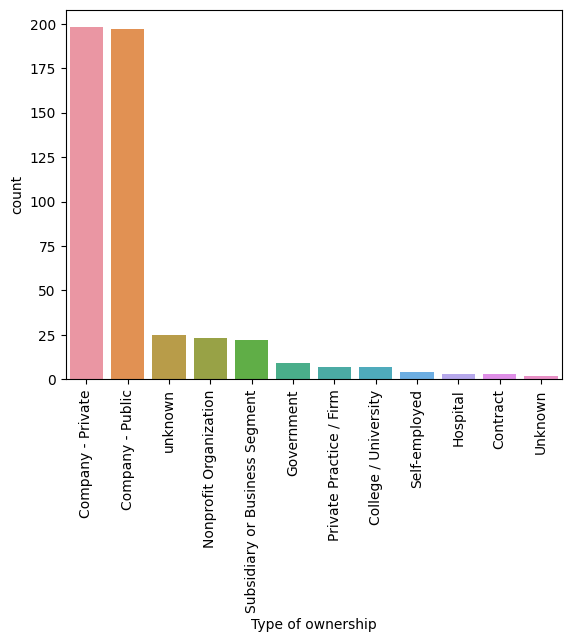

graph for Industry: total = 59


C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


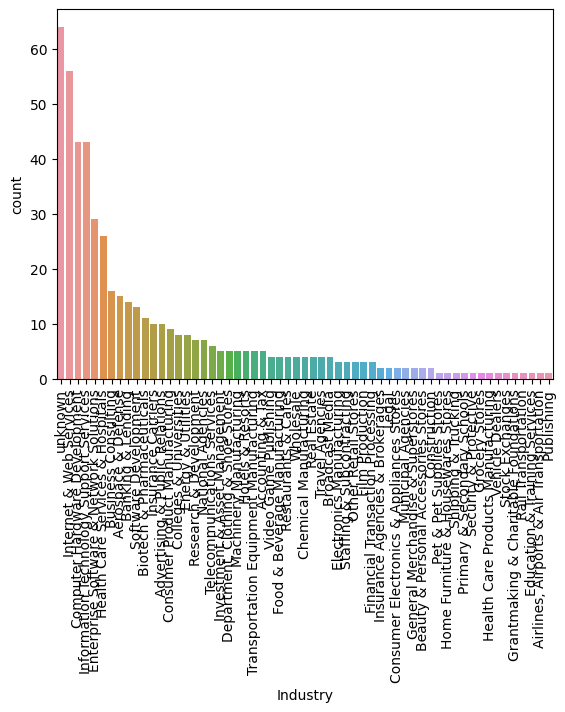

graph for Sector: total = 23


C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


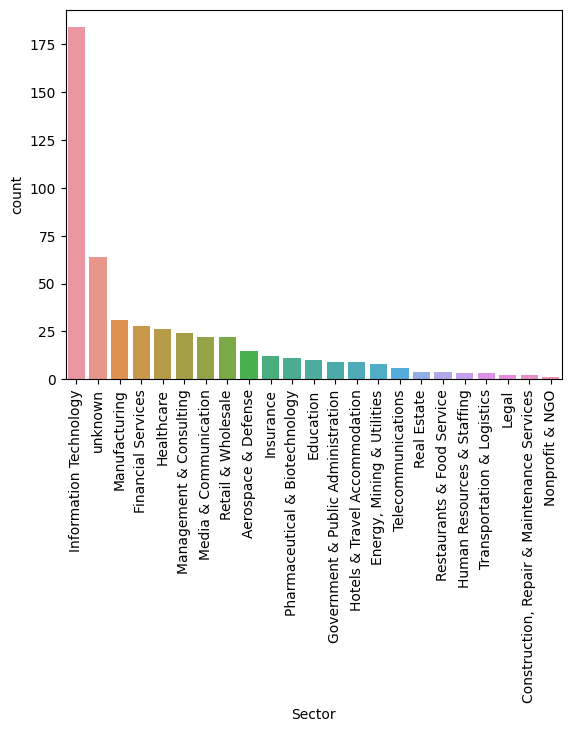

graph for Revenue: total = 11


C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


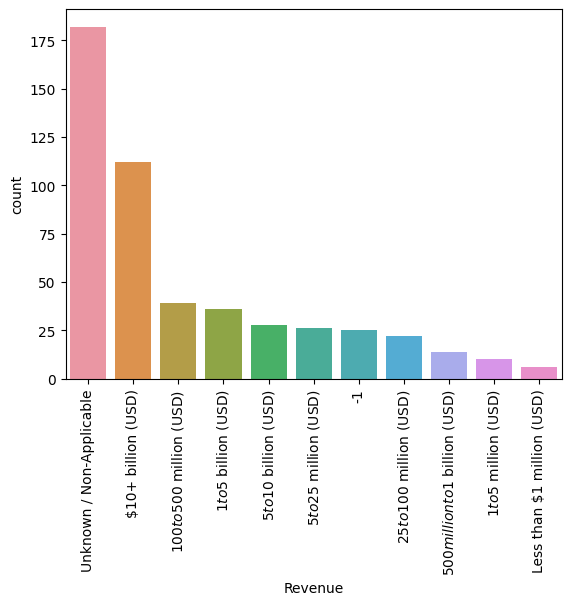

graph for Company_txt: total = 416


C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


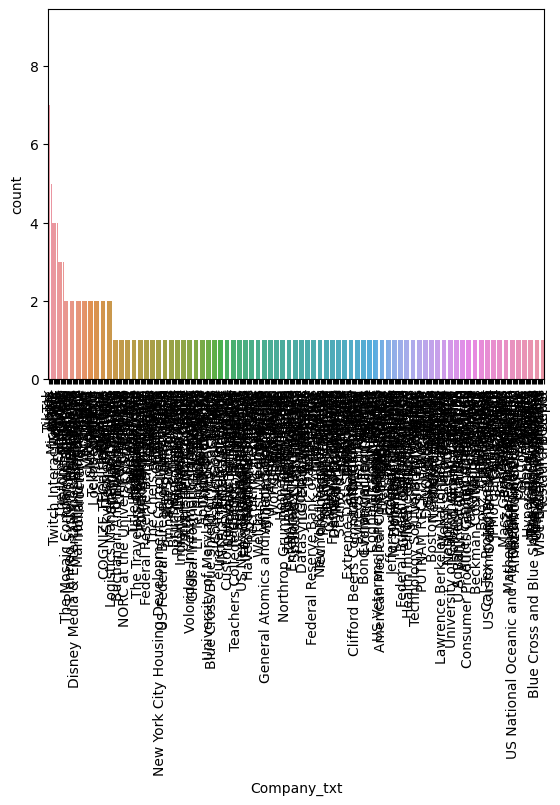

graph for Job_State: total = 42


C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


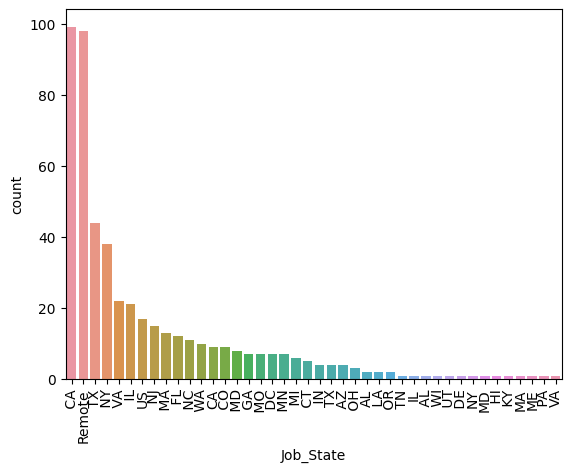

graph for python_yn: total = 2


C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


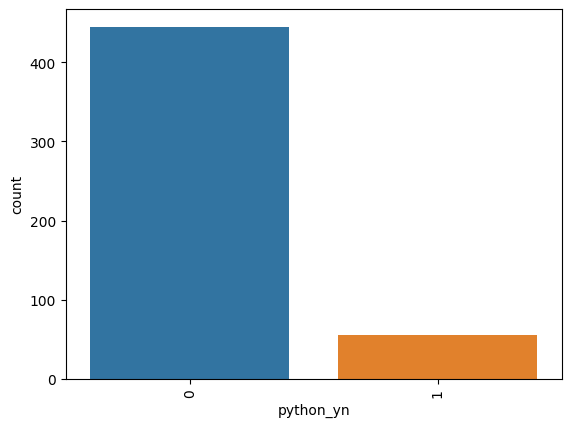

graph for spark_yn: total = 2


C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


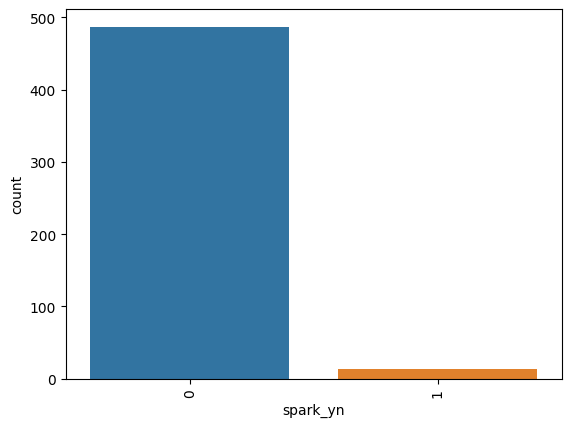

C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


graph for aws_yn: total = 2


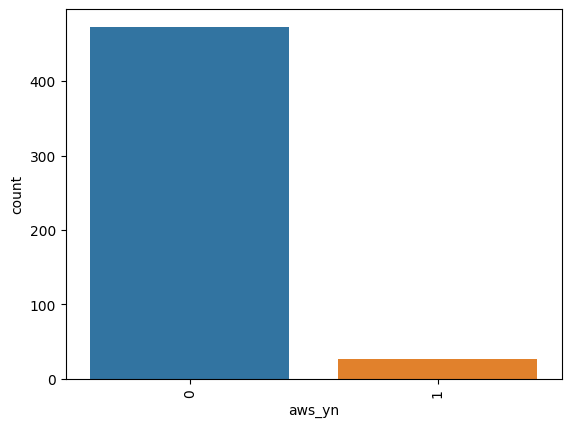

graph for excel_yn: total = 2


C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


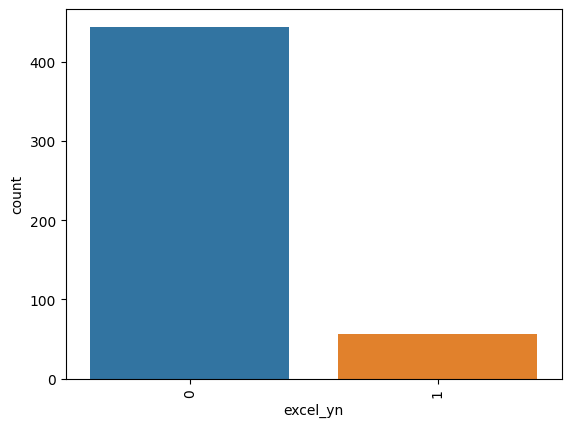

graph for job_simp: total = 4


C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


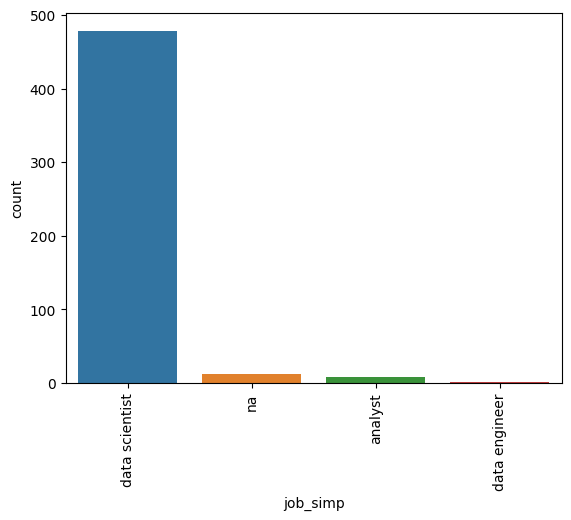

graph for seniority: total = 3


C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


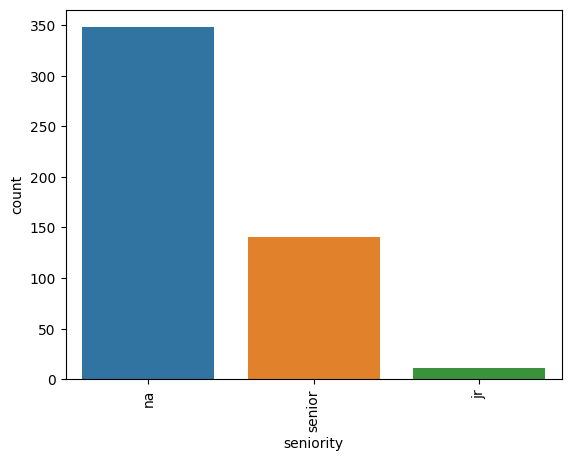

In [29]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


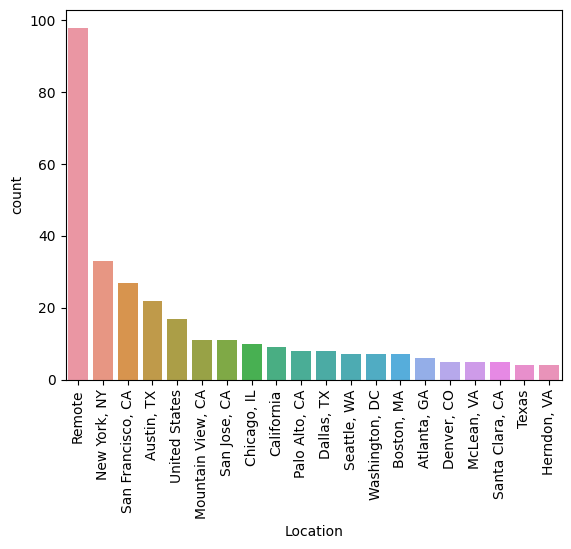

graph for Job_State: total = 20


C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


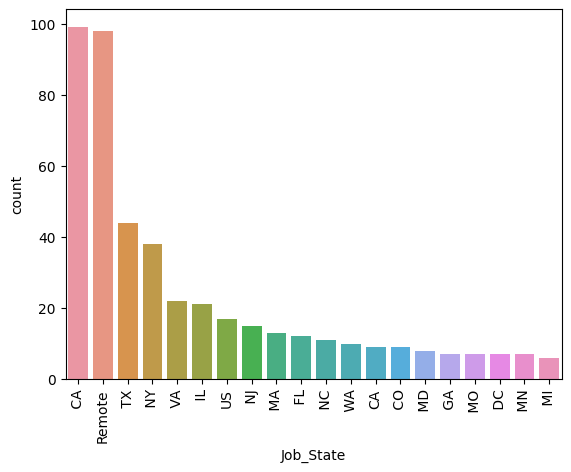

graph for Company_txt: total = 20


C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kinwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


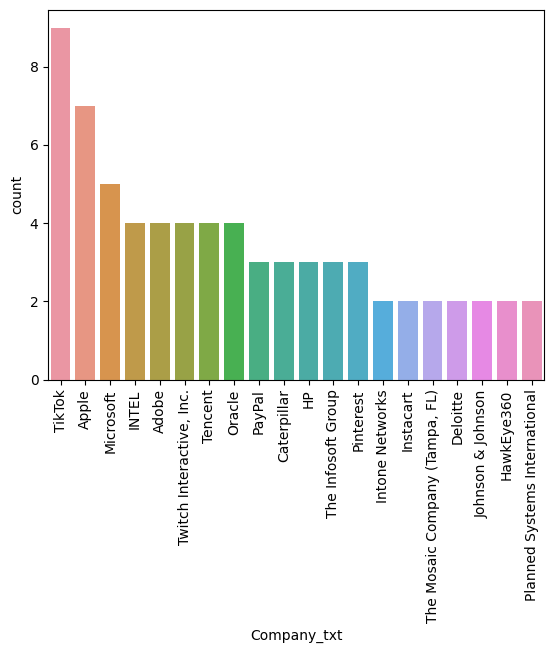

In [30]:
for i in df_cat[['Location','Job_State','Company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [31]:
pd.pivot_table(df ,index= 'job_simp', values='avg_salary')

,avg_salary
job_simp,
analyst,145.000000
data engineer,157.000000
data scientist,146.890167
na,139.375000


In [32]:
pd.pivot_table(df ,index=['job_simp', 'seniority'], values='avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          76.250000
               na         167.916667
data engineer  na         165.000000
               senior     149.000000
data scientist jr         147.500000
               na         141.993921
               senior     158.357143
na             na         139.375000

In [33]:
pd.pivot_table(df ,index= 'Job_State', values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
Job_State,
IL,242.500000
MD,224.500000
HI,224.500000
LA,195.750000
IN,179.375000
OR,179.000000
MN,167.928571
NY,166.000000
IL,164.976190


In [34]:
pd.set_option('display.max_rows', None)

In [35]:
pd.pivot_table(df ,index= ['Job_State', 'job_simp'], values='avg_salary').sort_values('Job_State', ascending=False)

avg_salary
Job_State job_simp                  
VA        data scientist  126.500000
US        data scientist  151.500000
TX        data scientist  157.750000
Remote    na              186.500000
          data scientist  133.853261
          data engineer   149.000000
          analyst          76.250000
NY        data scientist  149.000000
ME        data scientist   87.500000
MD        data scientist  224.500000
MA        data scientist  118.000000
IL        data scientist  242.500000
CA        data scientist  143.833333
AL        na              108.500000
 WI       data scientist  149.000000
 WA       data scientist  158.850000
 VA       data scientist  149.425000
          analyst         186.750000
 UT       data scientist  115.500000
 TX       na               87.500000
          data scientist  137.220930
 TN       data scientist  115.500000
 PA       data scientist   87.500000
 OR       data scientist  179.000000
 OH       na               65.000000
          data scientist  184.500000
 NY       na              195.750000
          data scientist  164.347222
 NJ       data scientist  131.733333
 NC       data scientist  136.900000
          analyst         149.000000
 MO       data scientist  160.642857
 MN       data scientist  155.500000
          analyst         242.500000
 MI       na               65.000000
          data scientist  153.900000
 MD       data scientist  148.312500
 MA       data scientist  136.416667
          data engineer   165.000000
 LA       data scientist  195.750000
 KY       data scientist  118.000000
 IN       data scientist  179.375000
 IL       data scientist  164.976190
 HI       data scientist  224.500000
 GA       data scientist  142.285714
 FL       data scientist  149.500000
          analyst         118.000000
 DE       data scientist   65.000000
 DC       data scientist  157.071429
 CT       data scientist  119.200000
 CO       data scientist  155.055556
 CA       analyst         124.500000
          na              143.500000
          data scientist  149.588542
 AZ       data scientist  161.000000
 AL       data scientist  149.000000

In [36]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'Job_State', values = 'avg_salary').sort_values('avg_salary',
                                                                                                           ascending = False)

,avg_salary
Job_State,
IL,242.500000
HI,224.500000
MD,224.500000
LA,195.750000
OH,184.500000
IN,179.375000
OR,179.000000
IL,164.976190
NY,164.347222


In [37]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'Company_txt', 'Job_State', 'age_of_company', 'python_yn',
       'sql_yn', 'excel_yn', 'spark_yn', 'aws_yn', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

In [38]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'avg_salary', 'python_yn', 'desc_len', 'Type of ownership']]

In [39]:
for i in df_pivots.columns:
    
    print(pd.pivot_table(df_pivots, index= i, values='avg_salary').sort_values('avg_salary',ascending=False))

        avg_salary
Rating            
 2.7    242.500000
 4.6    206.300000
 3.5    175.074074
 3.8    160.222222
 4.8    159.333333
 3.6    158.125000
 3.4    152.891304
 4.2    151.950000
 2.8    150.500000
 3.9    149.637255
 4.0    147.921569
 3.0    146.700000
 4.9    146.642857
 4.3    143.603448
 2.6    143.500000
 3.3    142.187500
 3.7    141.400000
 4.5    140.600000
 4.1    140.118421
 2.9    139.312500
 5.0    132.500000
-1.0    131.741379
 4.7    130.750000
 3.1    125.785714
 4.4    122.863636
 2.4    118.000000
 2.3    112.000000
 3.2    110.666667
 2.0     76.250000
                                          avg_salary
Industry                                            
Shipping & Trucking                       242.500000
Primary & Secondary Schools               242.500000
Health Care Products Manufacturing        224.500000
Home Furniture & Housewares Stores        222.000000
Other Retail Stores                       209.833333
Municipal Agencies                      

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [40]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $5 billion (USD),36.0,NaN
$1 to $5 million (USD),7.0,3.0
$10+ billion (USD),100.0,12.0
$100 to $500 million (USD),37.0,2.0
$25 to $100 million (USD),21.0,1.0
$5 to $10 billion (USD),23.0,5.0
$5 to $25 million (USD),24.0,2.0
$500 million to $1 billion (USD),13.0,1.0
-1,21.0,4.0


In [41]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kinwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kinwa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

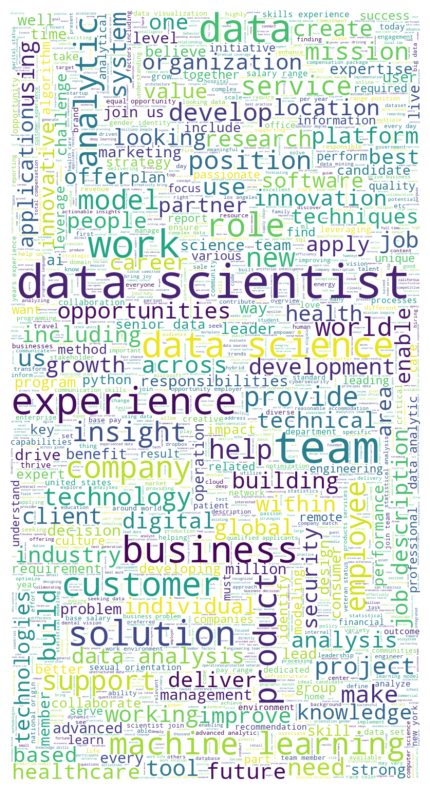

In [42]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [43]:
df.to_csv('eda_data.csv')